## Tirgul 9 A sample project analysis

- Read the data
- Filter data
- Determine features
- Determine label

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Dataset
The dataset contanins information on students and their grades in math, reading and writing.

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [3]:
# Clear N/A
data = data.dropna(axis=0)
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Apearantly there weren't any 'na's' in the data

In [4]:
# let's see some summary
data.pivot_table(['math score','reading score','writing score' ],'gender') # note the default is mean

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Looks like the male students are leading in Math, but are behind on Reading and Writing

## Ploting a histogram
Let's display a histogram for each subject by gender.

Top is female.


[pandas_hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

gender
female    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
male      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

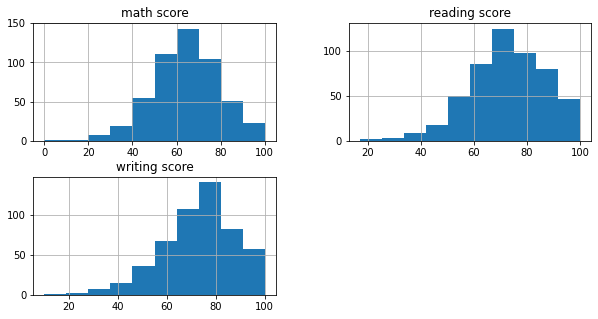

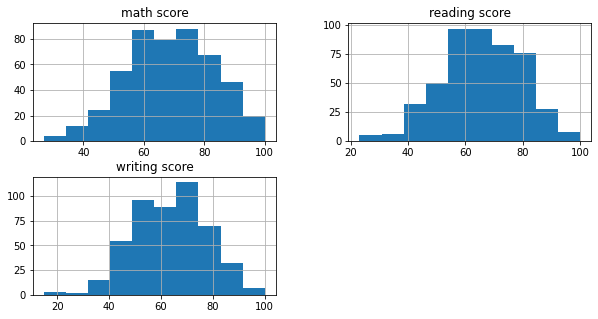

In [5]:
data.groupby('gender').hist(figsize=(10,5))

Let's calculate the variance and the range of scores

In [6]:
data.groupby('gender').var()

,math score,reading score,writing score
gender,,,
female,239.985124,206.733938,220.369327
male,206.102695,194.095945,199.200248


We can see that male students tend to have a smaller variance then the female students.

## Correlation between scores

In [7]:
scoreData = data[['math score','reading score','writing score']]
scoreData.tail()

,math score,reading score,writing score
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77
999,77,86,86


In [8]:
scoreData.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


The corrolation across subjects is quite high, but between reading and writing is near perfect.

<AxesSubplot:>

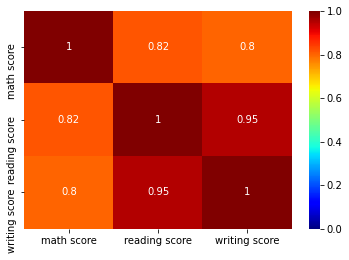

In [9]:
# cmap='jet' refers to table colors
#  vmin=0.0 , vmax = 1 indicate the lower and upper bounderies of legend 
# annot=True display the value of each square
sns.heatmap(scoreData.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)

## $\pi$-Charts
[pie charts docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)

In [10]:
parentEducData = data[["parental level of education"]]
parentEducData.tail()

,parental level of education
995,master's degree
996,high school
997,high school
998,some college
999,some college


In [11]:
parentEducData.value_counts() # counts the amount from each categorized value

parental level of education
some college                   226
associate's degree             222
high school                    196
some high school               179
bachelor's degree              118
master's degree                 59
dtype: int64

<AxesSubplot:ylabel='None'>

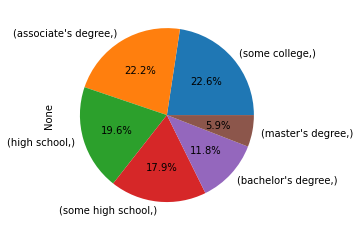

In [12]:
parentEducData.value_counts().plot.pie(autopct='%1.1f%%')
# autopct display percents for each part

## Looking for more correlation

In [13]:
data['mean score'] = scoreData.mean(axis=1)
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333
999,female,group D,some college,free/reduced,none,77,86,86,83.000000


## Is there any connection between parental level of education and lunch to grades?

In [14]:
EducLunchMean_ScoreData = data[['parental level of education','lunch','mean score']].copy(deep=True)
EducLunchMean_ScoreData.tail()

,parental level of education,lunch,mean score
995,master's degree,standard,94.000000
996,high school,free/reduced,57.333333
997,high school,free/reduced,65.000000
998,some college,standard,74.333333
999,some college,free/reduced,83.000000


In [15]:
EducLunchMean_ScoreData.groupby('parental level of education').mean().sort_values('mean score')

,mean score
parental level of education,
high school,63.096939
some high school,65.108007
some college,68.476401
associate's degree,69.569069
bachelor's degree,71.923729
master's degree,73.598870


parental level of education
associate's degree    AxesSubplot(0.125,0.125;0.775x0.755)
bachelor's degree     AxesSubplot(0.125,0.125;0.775x0.755)
high school           AxesSubplot(0.125,0.125;0.775x0.755)
master's degree       AxesSubplot(0.125,0.125;0.775x0.755)
some college          AxesSubplot(0.125,0.125;0.775x0.755)
some high school      AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean score, dtype: object

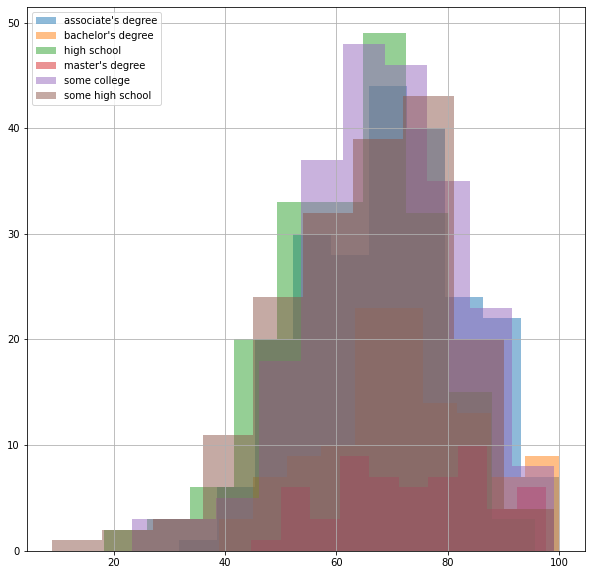

In [16]:
EducLunchMean_ScoreData.groupby('parental level of education')['mean score'].hist(alpha=0.5,legend=True,figsize=(10,10))
# maybe 2 subplots

We can see that from "some college" to "master's degree" the difference is small

In [17]:
EducLunchMean_ScoreData.groupby('lunch')[['mean score']].mean()

,mean score
lunch,
free/reduced,62.199061
standard,70.837209


lunch
free/reduced    AxesSubplot(0.125,0.125;0.775x0.755)
standard        AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean score, dtype: object

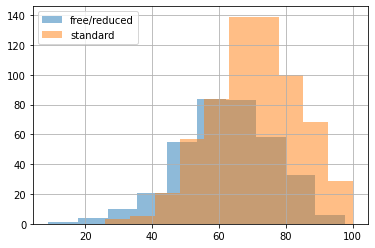

In [18]:
EducLunchMean_ScoreData.groupby('lunch')['mean score'].hist(alpha=0.5,legend=True)

The lunch type tells us more about the student potential

In [19]:
EducLunchMean_ScoreData['lunch_cat'] = EducLunchMean_ScoreData['lunch'].astype('category').cat.codes
EducLunchMean_ScoreData

,parental level of education,lunch,mean score,lunch_cat
0,bachelor's degree,standard,72.666667,1
1,some college,standard,82.333333,1
2,master's degree,standard,92.666667,1
3,associate's degree,free/reduced,49.333333,0
4,some college,standard,76.333333,1
...,...,...,...,...
995,master's degree,standard,94.000000,1
996,high school,free/reduced,57.333333,0
997,high school,free/reduced,65.000000,0
998,some college,standard,74.333333,1


Standard = 1

free/reduced = 0

In [20]:
EducLunchMean_ScoreData.groupby(['parental level of education'])['lunch_cat'].mean().sort_values()

parental level of education
master's degree       0.593220
bachelor's degree     0.627119
high school           0.642857
some college          0.650442
associate's degree    0.653153
some high school      0.659218
Name: lunch_cat, dtype: float64

### It is interesting to see, that the lunch type is spread more or less equaly between the education levels
So one can assume that getting a free/reduced lunch is a good indecator for you score

In [21]:
EducLunchMean_ScoreData.groupby(['parental level of education','lunch'])[['mean score']].mean()

mean score
parental level of education lunch                   
associate's degree          free/reduced   65.428571
                            standard       71.767816
bachelor's degree           free/reduced   67.053030
                            standard       74.819820
high school                 free/reduced   57.376190
                            standard       66.275132
master's degree             free/reduced   67.111111
                            standard       78.047619
some college                free/reduced   62.970464
                            standard       71.435374
some high school            free/reduced   57.224044
                            standard       69.183616

## Boxplot for mean score

<AxesSubplot:>

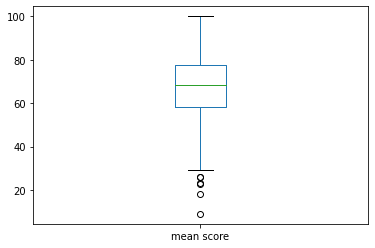

In [22]:
EducLunchMean_ScoreData['mean score'].plot(kind='box')

## Trees!!

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

data = pd.read_csv('StudentsPerformance.csv')
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## Preparing the data for learning

In [24]:
X = pd.get_dummies(data[['gender','race/ethnicity','lunch','test preparation course']])
y = data[['math score','reading score', 'writing score']]

X.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,1,1,0
2,1,0,0,1,0,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,1


## Let's remove the reduntant fields

In [25]:
X = X.drop(columns=['gender_male','lunch_standard','test preparation course_none'])
X.head()

,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,test preparation course_completed
0,1,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,1
2,1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y['math score'],test_size=0.3,random_state=42)

In [27]:
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

## Eval Function

In [29]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))

In [30]:
eval(X_test,y_test,model)

MSE: 14.610


## Draw Tree function
[plot_tree docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

In [31]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

MSE: 14.544


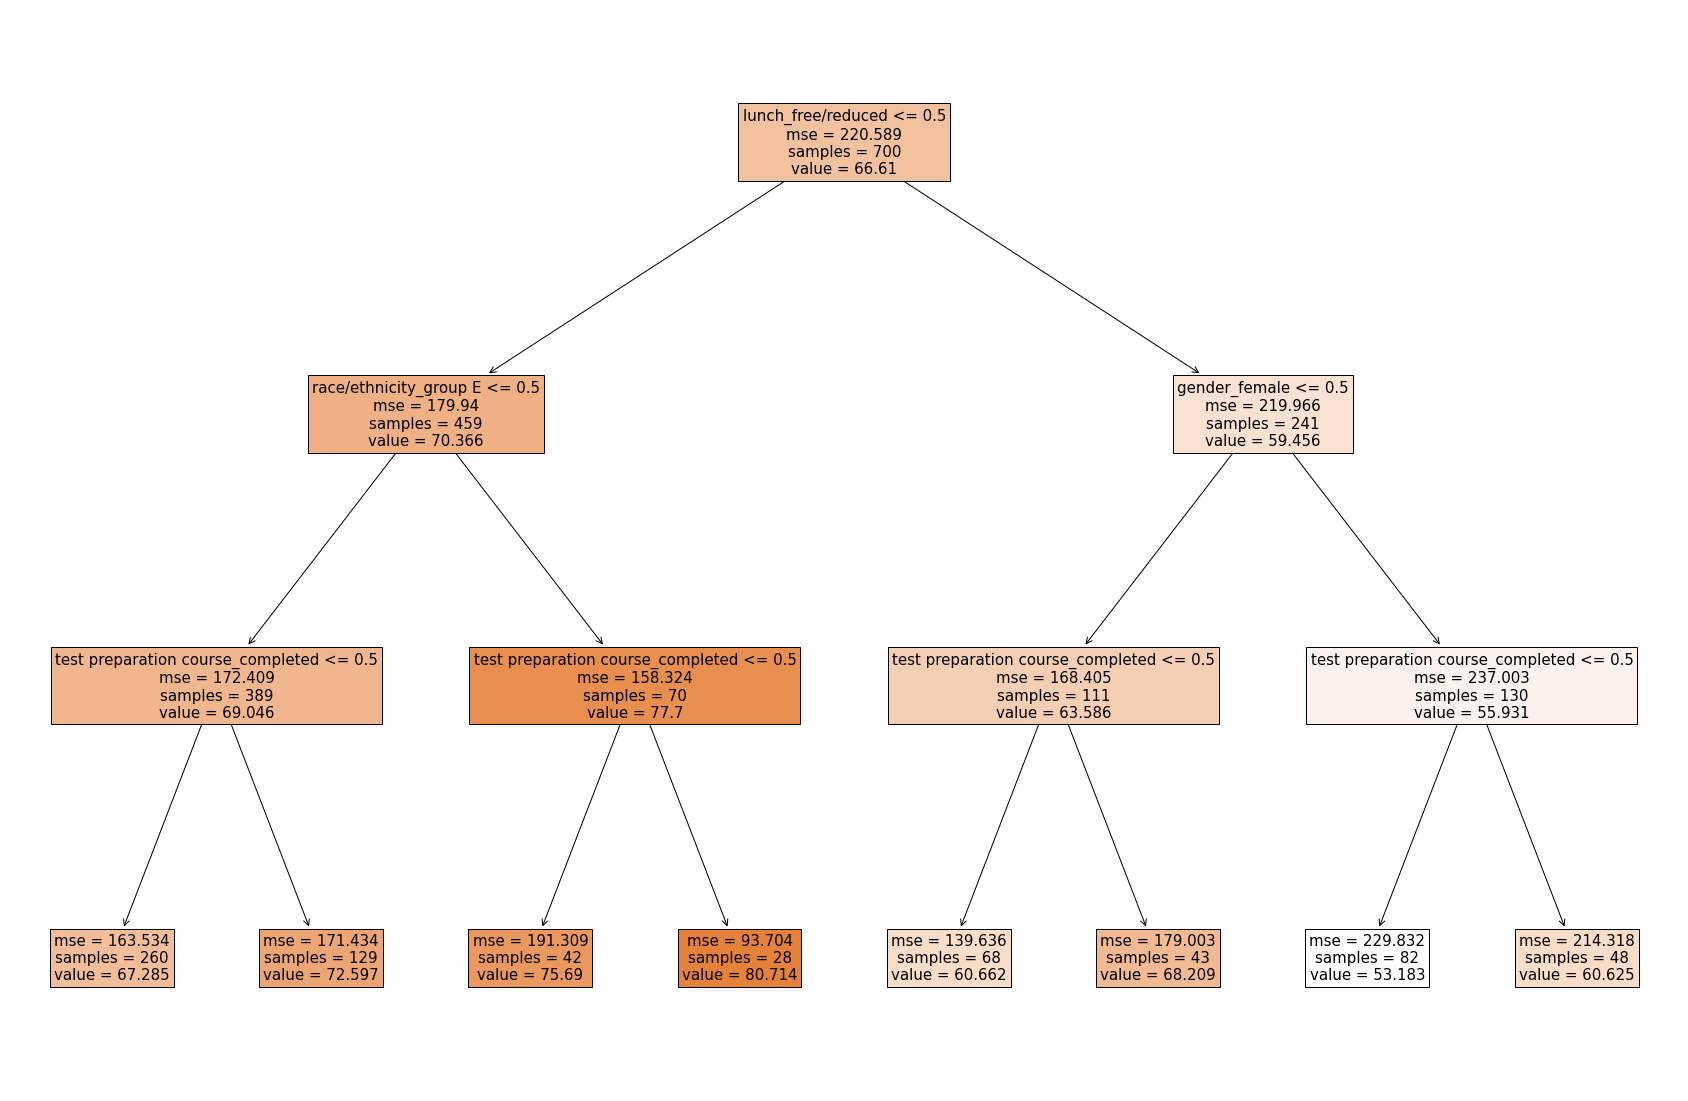

In [32]:
model = DecisionTreeRegressor(max_depth=3,random_state=42)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(30,20))

MSE: 14.577


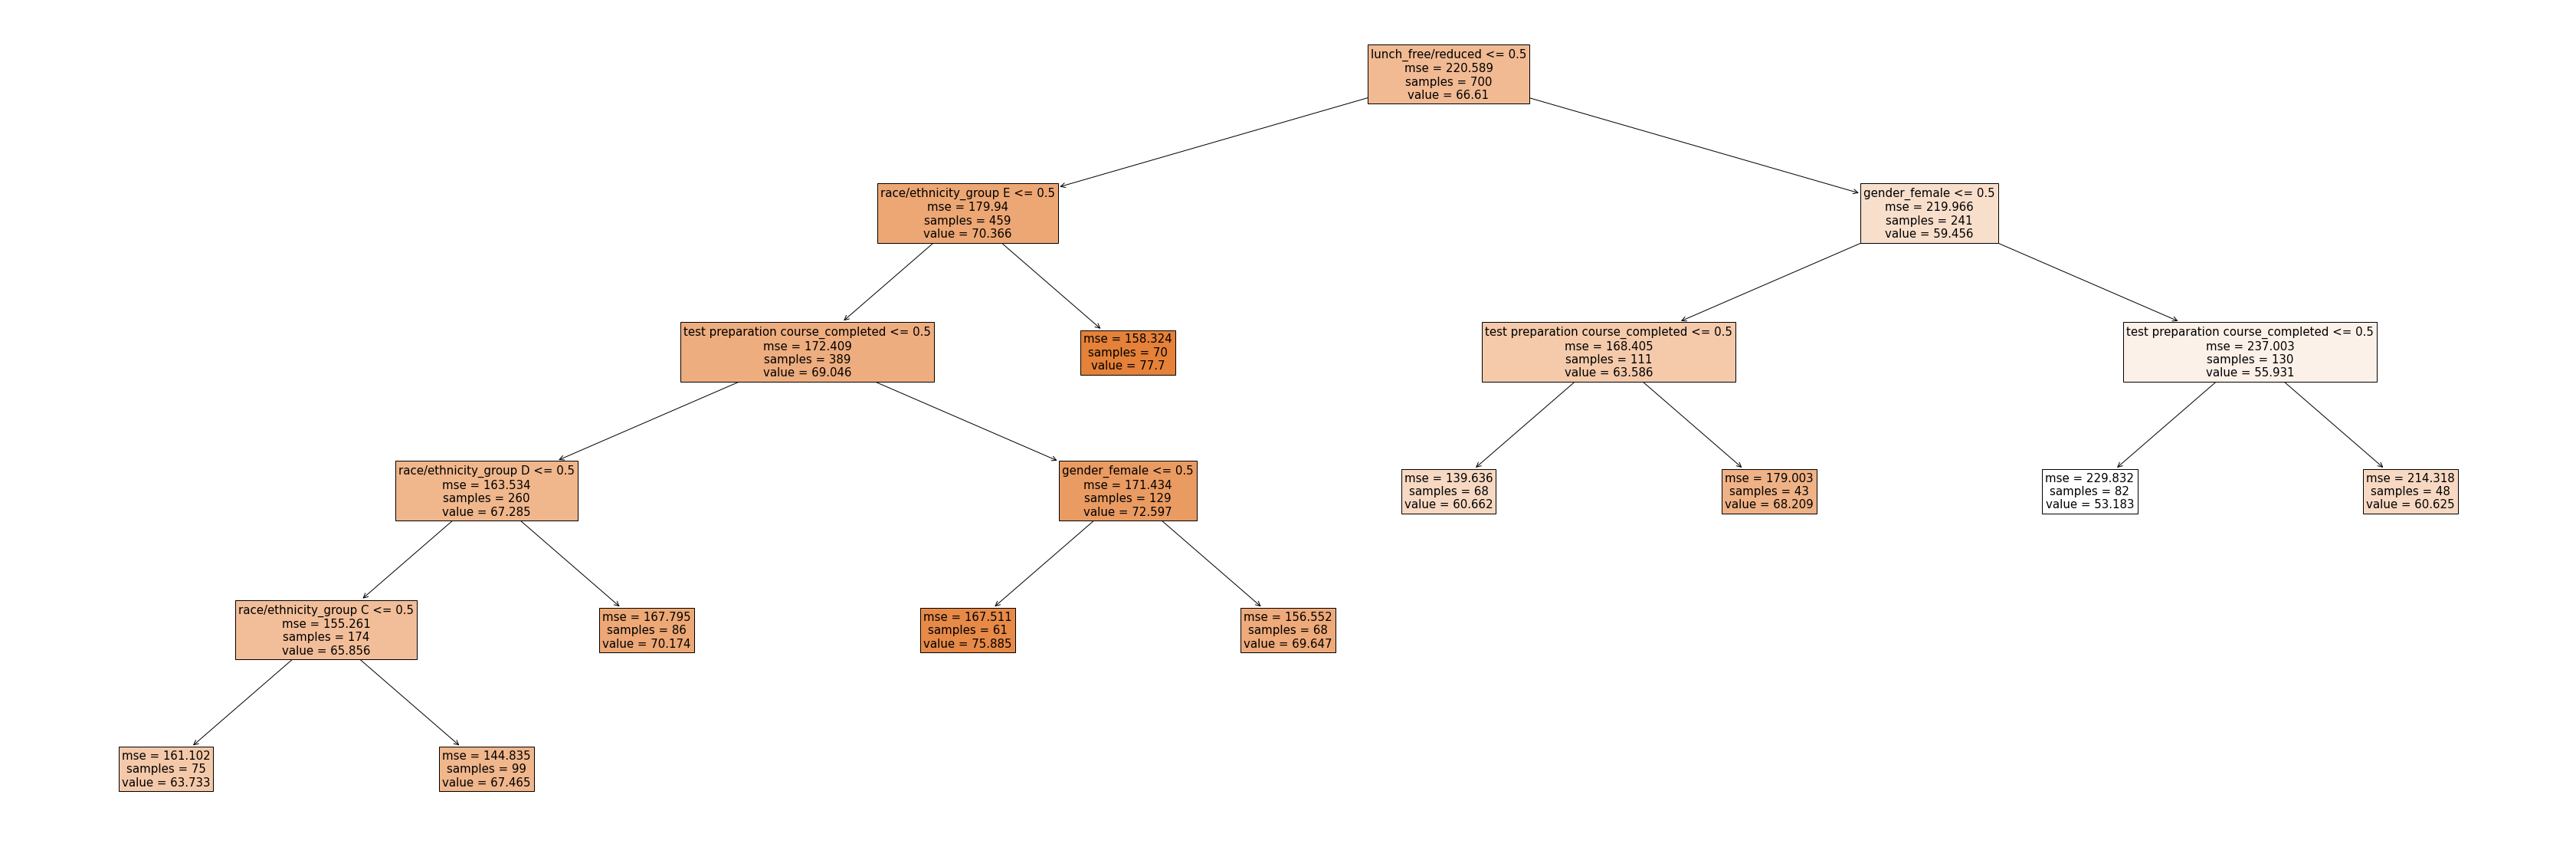

In [33]:
model = DecisionTreeRegressor(min_samples_split=100,random_state=42)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(60,20))